In [1]:
import pandas as pd
import numpy as  np

In [2]:
import seaborn

p=seaborn.load_dataset('penguins')

1. NA값 처리
2. 데이터 타입 확인/ 변환
3. Describe 활용
4. 시각화(단변량, 다변량) 및 관계성 체크


In [3]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
new_p=p.dropna()

In [7]:
print(new_p.species.value_counts(),
     new_p.island.value_counts(),
     new_p.sex.value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64 Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64 Male      168
Female    165
Name: sex, dtype: int64


In [9]:
new_p.loc[:,'island']=new_p.island.copy().astype('category')

<AxesSubplot:>

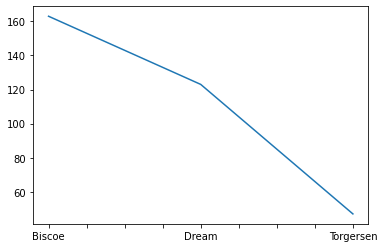

In [10]:
new_p.island.value_counts().plot()

<AxesSubplot:>

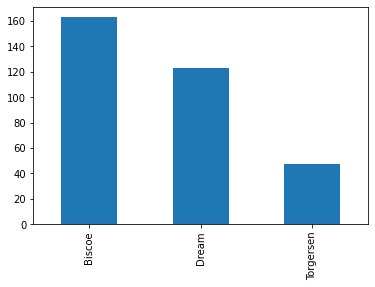

In [11]:
new_p.island.value_counts().plot(kind='bar')

9주차

In [12]:
college=pd.read_csv('data/college.csv')
cols=college.columns
cols

Index(['INSTNM', 'CITY', 'STABBR', 'HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL',
       'SATVRMID', 'SATMTMID', 'DISTANCEONLY', 'UGDS', 'UGDS_WHITE',
       'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI',
       'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF', 'CURROPER', 'PCTPELL',
       'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP'],
      dtype='object')

In [13]:
cols.values

array(['INSTNM', 'CITY', 'STABBR', 'HBCU', 'MENONLY', 'WOMENONLY',
       'RELAFFIL', 'SATVRMID', 'SATMTMID', 'DISTANCEONLY', 'UGDS',
       'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN',
       'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF',
       'CURROPER', 'PCTPELL', 'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10',
       'GRAD_DEBT_MDN_SUPP'], dtype=object)

In [14]:
cols[1::4]

Index(['CITY', 'WOMENONLY', 'DISTANCEONLY', 'UGDS_HISP', 'UGDS_2MOR',
       'CURROPER', 'MD_EARN_WNE_P10'],
      dtype='object')

In [15]:
print(cols.min(),cols.max(),cols.isnull().sum())

CITY WOMENONLY 0


In [17]:
print(cols.min(),cols.max(),cols.hasnans) #have, 즉 결측치를 갖고있니? =없다!

CITY WOMENONLY False


In [18]:
cols.sort_values()

Index(['CITY', 'CURROPER', 'DISTANCEONLY', 'GRAD_DEBT_MDN_SUPP', 'HBCU',
       'INSTNM', 'MD_EARN_WNE_P10', 'MENONLY', 'PCTFLOAN', 'PCTPELL',
       'PPTUG_EF', 'RELAFFIL', 'SATMTMID', 'SATVRMID', 'STABBR', 'UG25ABV',
       'UGDS', 'UGDS_2MOR', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK',
       'UGDS_HISP', 'UGDS_NHPI', 'UGDS_NRA', 'UGDS_UNKN', 'UGDS_WHITE',
       'WOMENONLY'],
      dtype='object')

컬럼 이름에 변화를 주고 싶을 때 아래와 같이 가능합니다.

In [16]:
cols+'_new'

Index(['INSTNM_new', 'CITY_new', 'STABBR_new', 'HBCU_new', 'MENONLY_new',
       'WOMENONLY_new', 'RELAFFIL_new', 'SATVRMID_new', 'SATMTMID_new',
       'DISTANCEONLY_new', 'UGDS_new', 'UGDS_WHITE_new', 'UGDS_BLACK_new',
       'UGDS_HISP_new', 'UGDS_ASIAN_new', 'UGDS_AIAN_new', 'UGDS_NHPI_new',
       'UGDS_2MOR_new', 'UGDS_NRA_new', 'UGDS_UNKN_new', 'PPTUG_EF_new',
       'CURROPER_new', 'PCTPELL_new', 'PCTFLOAN_new', 'UG25ABV_new',
       'MD_EARN_WNE_P10_new', 'GRAD_DEBT_MDN_SUPP_new'],
      dtype='object')

In [19]:
cols[1:5]+'_new'

Index(['CITY_new', 'STABBR_new', 'HBCU_new', 'MENONLY_new'], dtype='object')

G보다 큰건 트루 !

In [21]:
cols>'G'

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [22]:
cols[1]='CITY1'

TypeError: Index does not support mutable operations

## 집합의 개념을 사용할 수 있습니다.
## 합집합 = Union

In [23]:
c1=cols[:4]
c2=cols[2:6]
c1.union(c2)

Index(['CITY', 'HBCU', 'INSTNM', 'MENONLY', 'STABBR', 'WOMENONLY'], dtype='object')

# 교집합 = intersection

In [24]:
c1.intersection(c2)

Index(['STABBR', 'HBCU'], dtype='object')

In [25]:
c1.difference(c2)

Index(['CITY', 'INSTNM'], dtype='object')

In [26]:
s1=pd.Series(index=list('aaab'),data=np.arange(4))
s2=pd.Series(index=list('cababb'),data=np.arange(6))

In [27]:
s1

a    0
a    1
a    2
b    3
dtype: int32

In [28]:
s2

c    0
a    1
b    2
a    3
b    4
b    5
dtype: int32

In [29]:
s1+s2

a    1.0
a    3.0
a    2.0
a    4.0
a    3.0
a    5.0
b    5.0
b    7.0
b    8.0
c    NaN
dtype: float64

4개 6개였는데 더하니 길이가 대폭 늘어났다. 
C는 없으니 결측치가 된다. Na+0은 Na!

인덱스가 일치하지않는경우에는 카티션 프로덕트를 만드는게 판다스의 기본 원칙이다.

In [31]:
s1=pd.Series(index=list('aaabb'),data=np.arange(5))
s2=pd.Series(index=list('bbaaa'),data=np.arange(5))

In [32]:
s1+s2

a    2
a    3
a    4
a    3
a    4
a    5
a    4
a    5
a    6
b    3
b    4
b    4
b    5
dtype: int32

In [33]:
s1=pd.Series(index=list('ab'),data=np.arange(2))
s2=pd.Series(index=list('ba'),data=np.arange(2))
s1+s2

a    1
b    1
dtype: int32

그러니까 여러 컬럼을 조작할 때, 인덱스가 같은지 확인하는 것이 중요합니다.  
만약 이러한 상황을 고려하지 않는다면 인덱스가 무진장 많아지는 현상을 볼 수 있습니다.  
아래와 같이 말입니다!

In [34]:
emp=pd.read_csv('data/employee.csv',index_col='RACE')
emp.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
RACE,,,,,,,,,
Hispanic/Latino,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Full Time,Female,Active,2006-06-12,2012-10-13
Hispanic/Latino,1,LIBRARY ASSISTANT,Library,26125.0,Full Time,Female,Active,2000-07-19,2010-09-18
White,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,Full Time,Male,Active,2015-02-03,2015-02-03
White,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,Full Time,Male,Active,1982-02-08,1991-05-25
White,4,ELECTRICIAN,General Services Department,56347.0,Full Time,Male,Active,1989-06-19,1994-10-22


In [37]:
salary1=emp['BASE_SALARY']
salary2=emp['BASE_SALARY']
salary1 is salary2

True

얕은 복사가 되니 같은 것을 가리킵니다.  
깊은 복사를 하기 위해 .copy 를 사용합니다.

In [38]:
salary2=emp['BASE_SALARY'].copy()
salary1 is salary2

False

메모리 주소를 확인해보겠습니다. salary1과 salary2가 다른 메모리 주소를 가지고있음을 알 수 있습니다.

In [39]:
print(id(salary2),id(salary1),id(emp['BASE_SALARY']))

2084257913872 2084257839328 2084257839328


In [40]:
salary1=salary1.sort_index()

In [41]:
salary1+salary2

RACE
American Indian or Alaskan Native    138702.0
American Indian or Alaskan Native    156710.0
American Indian or Alaskan Native    176891.0
American Indian or Alaskan Native    159594.0
American Indian or Alaskan Native    127734.0
                                       ...   
NaN                                   68024.0
NaN                                   56048.0
NaN                                   56790.0
NaN                                       NaN
NaN                                   56048.0
Name: BASE_SALARY, Length: 1175424, dtype: float64

In [43]:
salary1

RACE
American Indian or Alaskan Native    78355.0
American Indian or Alaskan Native    26125.0
American Indian or Alaskan Native    98536.0
American Indian or Alaskan Native        NaN
American Indian or Alaskan Native    55461.0
                                      ...   
NaN                                  40000.0
NaN                                  28024.0
NaN                                  28766.0
NaN                                      NaN
NaN                                  28024.0
Name: BASE_SALARY, Length: 2000, dtype: float64

In [44]:
salary1+salary2

RACE
American Indian or Alaskan Native    138702.0
American Indian or Alaskan Native    156710.0
American Indian or Alaskan Native    176891.0
American Indian or Alaskan Native    159594.0
American Indian or Alaskan Native    127734.0
                                       ...   
NaN                                   68024.0
NaN                                   56048.0
NaN                                   56790.0
NaN                                       NaN
NaN                                   56048.0
Name: BASE_SALARY, Length: 1175424, dtype: float64

In [45]:
salary1+salary1

RACE
American Indian or Alaskan Native    156710.0
American Indian or Alaskan Native     52250.0
American Indian or Alaskan Native    197072.0
American Indian or Alaskan Native         NaN
American Indian or Alaskan Native    110922.0
                                       ...   
NaN                                   80000.0
NaN                                   56048.0
NaN                                   57532.0
NaN                                       NaN
NaN                                   56048.0
Name: BASE_SALARY, Length: 2000, dtype: float64

sort한 뒤에 더하면 length가 유지됩니다.

In [46]:
salary1+salary2.sort_index()

RACE
American Indian or Alaskan Native    156710.0
American Indian or Alaskan Native     52250.0
American Indian or Alaskan Native    197072.0
American Indian or Alaskan Native         NaN
American Indian or Alaskan Native    110922.0
                                       ...   
NaN                                   80000.0
NaN                                   56048.0
NaN                                   57532.0
NaN                                       NaN
NaN                                   56048.0
Name: BASE_SALARY, Length: 2000, dtype: float64

In [47]:
baseball_14=pd.read_csv('data/baseball14.csv',index_col='playerID')
baseball_15=pd.read_csv('data/baseball15.csv',index_col='playerID')
baseball_16=pd.read_csv('data/baseball16.csv',index_col='playerID')

In [48]:
baseball_14.head()

,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,
altuvjo01,2014,1,HOU,AL,158,660,85,225,47,3,...,59.0,56.0,9.0,36,53.0,7.0,5.0,1.0,5.0,20.0
cartech02,2014,1,HOU,AL,145,507,68,115,21,1,...,88.0,5.0,2.0,56,182.0,6.0,5.0,0.0,4.0,12.0
castrja01,2014,1,HOU,AL,126,465,43,103,21,2,...,56.0,1.0,0.0,34,151.0,1.0,9.0,1.0,3.0,11.0
corpoca01,2014,1,HOU,AL,55,170,22,40,6,0,...,19.0,0.0,0.0,14,37.0,0.0,3.0,1.0,2.0,3.0
dominma01,2014,1,HOU,AL,157,564,51,121,17,0,...,57.0,0.0,1.0,29,125.0,2.0,5.0,2.0,7.0,23.0


In [49]:
baseball_14.index.difference(baseball_15.index)

Index(['corpoca01', 'dominma01', 'fowlede01', 'grossro01', 'guzmaje01',
       'hoeslj01', 'krausma01', 'preslal01', 'singljo02'],
      dtype='object', name='playerID')

In [50]:
baseball_14.index

Index(['altuvjo01', 'cartech02', 'castrja01', 'corpoca01', 'dominma01',
       'fowlede01', 'gonzama01', 'grossro01', 'guzmaje01', 'hoeslj01',
       'krausma01', 'marisja01', 'preslal01', 'singljo02', 'springe01',
       'villajo01'],
      dtype='object', name='playerID')

그렇다면 14년도에 뛰었지만 15년도에 뛰지않은 사람을 보기 위해서는 14-15!

In [51]:
baseball_15.index

Index(['altuvjo01', 'cartech02', 'castrja01', 'congeha01', 'correca01',
       'gattiev01', 'gomezca01', 'gonzama01', 'lowrije01', 'marisja01',
       'rasmuco01', 'springe01', 'tuckepr01', 'valbulu01', 'villajo01'],
      dtype='object', name='playerID')

In [52]:
baseball_14.index.difference(baseball_15.index)

Index(['corpoca01', 'dominma01', 'fowlede01', 'grossro01', 'guzmaje01',
       'hoeslj01', 'krausma01', 'preslal01', 'singljo02'],
      dtype='object', name='playerID')

In [53]:
baseball_15.index.difference(baseball_14.index)

Index(['congeha01', 'correca01', 'gattiev01', 'gomezca01', 'lowrije01',
       'rasmuco01', 'tuckepr01', 'valbulu01'],
      dtype='object', name='playerID')

In [54]:
hits_14=baseball_14['H']
hits_15=baseball_15['H']
hits_16=baseball_16['H']

hits_14.head()

playerID
altuvjo01    225
cartech02    115
castrja01    103
corpoca01     40
dominma01    121
Name: H, dtype: int64

두 년도를 더해봅니다. 두개년도의 안타수를 더합니다.   
한해만 들어가있을수도, 두해 둘다 들어가있을 수도 있습니다.  
fillNa처리가 안되므로 add를 사용합니다

In [55]:
(hits_14+hits_15).head()

playerID
altuvjo01    425.0
cartech02    193.0
castrja01    174.0
congeha01      NaN
corpoca01      NaN
Name: H, dtype: float64

In [58]:
hits_total=hits_14.add(hits_15,fill_value=0).add(hits_16,fill_value=0)

In [59]:
hits_total.head()

playerID
altuvjo01    641.0
bregmal01     53.0
cartech02    193.0
castrja01    243.0
congeha01     46.0
Name: H, dtype: float64

In [62]:
hits_total=hits_14.add(hits_15,fill_value=0).add(hits_16,fill_value=0)
hits_total.head()

playerID
altuvjo01    641.0
bregmal01     53.0
cartech02    193.0
castrja01    243.0
congeha01     46.0
Name: H, dtype: float64

한 해만 등장했던 사람들도 전부 등장합니다. 

In [63]:
s=pd.Series(index=list('abcd'),data=[np.nan,3,np.nan,1])
s1=pd.Series(index=list('abc'),data=[np.nan,6,10])

In [64]:
s

a    NaN
b    3.0
c    NaN
d    1.0
dtype: float64

In [65]:
s1

a     NaN
b     6.0
c    10.0
dtype: float64

In [66]:
s.add(s1,fill_value=5)

a     NaN
b     9.0
c    15.0
d     6.0
dtype: float64

Series의 덧셈에서 나아가, DF의 덧셈도 인덱스를 맞춰 진행할 수 있습니다.  
다만, 카티션 곱!을 조심해야합니다.  
df는 컬럼과 인덱스 데이터, 시리즈는 인덱스 데이터죠. 차이점은 컬럼이었죠

In [67]:
df_14=baseball_14[['G','AB','R','H']]
df_15=baseball_15[['AB','R','H','HR']]

In [68]:
(df_14+df_15).head(10)

,AB,G,H,HR,R
playerID,,,,,
altuvjo01,1298.0,NaN,425.0,NaN,171.0
cartech02,898.0,NaN,193.0,NaN,118.0
castrja01,802.0,NaN,174.0,NaN,81.0
congeha01,NaN,NaN,NaN,NaN,NaN
corpoca01,NaN,NaN,NaN,NaN,NaN
correca01,NaN,NaN,NaN,NaN,NaN
dominma01,NaN,NaN,NaN,NaN,NaN
fowlede01,NaN,NaN,NaN,NaN,NaN
gattiev01,NaN,NaN,NaN,NaN,NaN


In [70]:
(df_14+df_15)

,AB,G,H,HR,R
playerID,,,,,
altuvjo01,1298.0,NaN,425.0,NaN,171.0
cartech02,898.0,NaN,193.0,NaN,118.0
castrja01,802.0,NaN,174.0,NaN,81.0
congeha01,NaN,NaN,NaN,NaN,NaN
corpoca01,NaN,NaN,NaN,NaN,NaN
correca01,NaN,NaN,NaN,NaN,NaN
dominma01,NaN,NaN,NaN,NaN,NaN
fowlede01,NaN,NaN,NaN,NaN,NaN
gattiev01,NaN,NaN,NaN,NaN,NaN


Add를 쓰면 좀 나아지겠지만, 문제를 해결해주진 못합니다.  
14/15년 중 한 해에만 기록이 있으면 문제가 되는 것이죠.

In [73]:
(
    df_14.add(df_15,fill_value=0)
    .head(10)
    .style.highlight_null('yellow')#이렇게 쓰면 최종 결과에서 null 값을 더  잘 보여줍니다.
)

,AB,G,H,HR,R
playerID,,,,,
altuvjo01,1298.000000,158.000000,425.000000,15.000000,171.000000
cartech02,898.000000,145.000000,193.000000,24.000000,118.000000
castrja01,802.000000,126.000000,174.000000,11.000000,81.000000
congeha01,201.000000,nan,46.000000,11.000000,25.000000
corpoca01,170.000000,55.000000,40.000000,nan,22.000000
correca01,387.000000,nan,108.000000,22.000000,52.000000
dominma01,564.000000,157.000000,121.000000,nan,51.000000
fowlede01,434.000000,116.000000,120.000000,nan,61.000000
gattiev01,566.000000,nan,139.000000,27.000000,66.000000


DF에 새 열을 추가할 때엔, 인덱스가 먼저 정렬이 됩니다. 여기선 SALARY에 대한 정보를 추가해 보겠습니다.  
1. 인덱스가 정렬되고, 정렬된 상태에서  
2. 열이 추가가 된다.

In [72]:
dept_sal=emp[['DEPARTMENT','BASE_SALARY']]

In [74]:
dept_sal=dept_sal.sort_values(['DEPARTMENT','BASE_SALARY'],
                             ascending=[True,False])

In [75]:
max_dept_sal=dept_sal.drop_duplicates(subset='DEPARTMENT')
max_dept_sal.head()

,DEPARTMENT,BASE_SALARY
RACE,,
White,Admn. & Regulatory Affairs,140416.0
Hispanic/Latino,City Controller's Office,64251.0
Black or African American,City Council,100000.0
Hispanic/Latino,Convention and Entertainment,38397.0
Black or African American,Dept of Neighborhoods (DON),89221.0


위 정보를 합치기 위해, 두 DF의 인덱스를 맞춰줍니다.

In [76]:
max_dept_sal=max_dept_sal.set_index('DEPARTMENT')
emp=emp.set_index('DEPARTMENT')

In [77]:
emp=emp.assign(MAX_DEPT_SALARY=max_dept_sal['BASE_SALARY'])

In [78]:
emp

,UNIQUE_ID,POSITION_TITLE,BASE_SALARY,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,MAX_DEPT_SALARY
DEPARTMENT,,,,,,,,,
Municipal Courts Department,0,ASSISTANT DIRECTOR (EX LVL),121862.0,Full Time,Female,Active,2006-06-12,2012-10-13,121862.0
Library,1,LIBRARY ASSISTANT,26125.0,Full Time,Female,Active,2000-07-19,2010-09-18,107763.0
Houston Police Department-HPD,2,POLICE OFFICER,45279.0,Full Time,Male,Active,2015-02-03,2015-02-03,199596.0
Houston Fire Department (HFD),3,ENGINEER/OPERATOR,63166.0,Full Time,Male,Active,1982-02-08,1991-05-25,210588.0
General Services Department,4,ELECTRICIAN,56347.0,Full Time,Male,Active,1989-06-19,1994-10-22,89194.0
...,...,...,...,...,...,...,...,...,...
Houston Police Department-HPD,1995,POLICE OFFICER,43443.0,Full Time,Male,Active,2014-06-09,2015-06-09,199596.0
Houston Fire Department (HFD),1996,COMMUNICATIONS CAPTAIN,66523.0,Full Time,Male,Active,2003-09-02,2013-10-06,210588.0
Houston Police Department-HPD,1997,POLICE OFFICER,43443.0,Full Time,Male,Active,2014-10-13,2015-10-13,199596.0


위의 작업을 차근차근해보겠습니다.  
emp에서 부서별 최고 급여를 찾은 뒤, 자신의 부서에서 가장 높은 급여를 컬럼으로 포함시키는 것입니다.  
이것은 department가 겹치지 않았기 때문에 가능한데, 만약 겹치는(중복된) 부서 이름이 등장하면 카티션 곱이 생성되었을 것입니다.  
그런데 이렇게 긴~코드를 작성하는 것은 귀찮으니까, **간단한 아래의 코드**를 보겠습니다. 

In [79]:
emp=pd.read_csv('data/employee.csv')

duplicate보다 groupby가 더 깔끔할겁니다. BASE_SALARY를 선택하고 그다음에 transform은 뒤에있는 함수명을 가져올때 인덱스를 유지할 수 있다. 그 행을 찾아서 가져오기때문에 transform을 씁니다.

In [80]:
max_sal=(
emp
.groupby('DEPARTMENT')
.BASE_SALARY
.transform('max')
)

In [81]:
max_sal

0       121862.0
1       107763.0
2       199596.0
3       210588.0
4        89194.0
          ...   
1995    199596.0
1996    210588.0
1997    199596.0
1998    199596.0
1999    210588.0
Name: BASE_SALARY, Length: 2000, dtype: float64

In [82]:
emp.assign(max_sal=max_sal)

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,max_sal
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,121862.0
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,107763.0
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,199596.0
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,210588.0
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,89194.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09,199596.0
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06,210588.0
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13,199596.0
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02,199596.0


In [83]:
max_sal

0       121862.0
1       107763.0
2       199596.0
3       210588.0
4        89194.0
          ...   
1995    199596.0
1996    210588.0
1997    199596.0
1998    199596.0
1999    210588.0
Name: BASE_SALARY, Length: 2000, dtype: float64

In [84]:
max_sal=(
emp.groupby('DEPARTMENT')
.BASE_SALARY
.max())

In [85]:
max_sal

DEPARTMENT
Admn. & Regulatory Affairs        140416.0
City Controller's Office           64251.0
City Council                      100000.0
Convention and Entertainment       38397.0
Dept of Neighborhoods (DON)        89221.0
Finance                            96272.0
Fleet Management Department       125884.0
General Services Department        89194.0
Health & Human Services           180416.0
Housing and Community Devp.        98536.0
Houston Airport System (HAS)      186192.0
Houston Emergency Center (HEC)     84456.0
Houston Fire Department (HFD)     210588.0
Houston Information Tech Svcs     102019.0
Houston Police Department-HPD     199596.0
Human Resources Dept.             110547.0
Legal Department                  275000.0
Library                           107763.0
Mayor's Office                    120750.0
Municipal Courts Department       121862.0
Parks & Recreation                 85055.0
Planning & Development             68762.0
Public Works & Engineering-PWE    178331.0


In [88]:
emp.set_index('DEPARTMENT').assign(max_sal=max_sal)

,UNIQUE_ID,POSITION_TITLE,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,max_sal
DEPARTMENT,,,,,,,,,,
Municipal Courts Department,0,ASSISTANT DIRECTOR (EX LVL),121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,121862.0
Library,1,LIBRARY ASSISTANT,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,107763.0
Houston Police Department-HPD,2,POLICE OFFICER,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,199596.0
Houston Fire Department (HFD),3,ENGINEER/OPERATOR,63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,210588.0
General Services Department,4,ELECTRICIAN,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,89194.0
...,...,...,...,...,...,...,...,...,...,...
Houston Police Department-HPD,1995,POLICE OFFICER,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09,199596.0
Houston Fire Department (HFD),1996,COMMUNICATIONS CAPTAIN,66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06,210588.0
Houston Police Department-HPD,1997,POLICE OFFICER,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13,199596.0


In [89]:
emp.assign(max_sal=max_sal)

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,max_sal
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,NaN
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,NaN
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,NaN
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,NaN
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09,NaN
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06,NaN
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13,NaN
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02,NaN


In [94]:
(
    emp.merge(
    max_sal.rename('MAX_DEPT_SALARY'),
    how='left', 
    left_on='DEPARTMENT', #leftON은 저컬럼을 가지고 붙이겠어 !
    right_index=True#right도 인덱스로 되어있는지 !
    )
)

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,MAX_DEPT_SALARY
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,121862.0
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,107763.0
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,199596.0
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,210588.0
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,89194.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09,199596.0
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06,210588.0
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13,199596.0
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02,199596.0


In [95]:
college=pd.read_csv('data/college.csv',index_col='INSTNM')

In [96]:
college.dtypes

CITY                   object
STABBR                 object
HBCU                  float64
MENONLY               float64
WOMENONLY             float64
RELAFFIL                int64
SATVRMID              float64
SATMTMID              float64
DISTANCEONLY          float64
UGDS                  float64
UGDS_WHITE            float64
UGDS_BLACK            float64
UGDS_HISP             float64
UGDS_ASIAN            float64
UGDS_AIAN             float64
UGDS_NHPI             float64
UGDS_2MOR             float64
UGDS_NRA              float64
UGDS_UNKN             float64
PPTUG_EF              float64
CURROPER                int64
PCTPELL               float64
PCTFLOAN              float64
UG25ABV               float64
MD_EARN_WNE_P10        object
GRAD_DEBT_MDN_SUPP     object
dtype: object

object로 되어있는것은 왜일까  
학생들의 프라이버시가 우려되기 때문에 제공하지 않는 것입니다.

In [97]:
college.MD_EARN_WNE_P10.value_counts().head()

PrivacySuppressed    822
38800                151
21500                 97
49200                 78
27400                 46
Name: MD_EARN_WNE_P10, dtype: int64

프라비어시때문에 지워진(가려진)데이터들이 문자형으로 들어있어 object로 되어있습니다.  
pandas 에서는 to_numeric을 통해 수치형 변수로 변결할 수 있습니다.   
이때  errors='coerce'로 바꿔주면 수치형이 아닌 값을 NaN으로 만들어 줍니다.  

In [103]:
cols=['MD_EARN_WNE_P10','GRAD_DEBT_MDN_SUPP']

for col in cols:
    college[col]=pd.to_numeric(
        college[col],errors='coerce'
    )

college.loc[:,cols].dtypes

MD_EARN_WNE_P10       float64
GRAD_DEBT_MDN_SUPP    float64
dtype: object

In [104]:
college_n=college.select_dtypes('number')
college_n.head()

,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,0.0333,0.9353,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300.0,33888.0
University of Alabama at Birmingham,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,0.5922,0.2600,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700.0,21941.5
Amridge University,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,0.2990,0.4192,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100.0,23370.0
University of Alabama in Huntsville,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,0.6988,0.1255,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500.0,24097.0
Alabama State University,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,0.0158,0.9208,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600.0,33118.5


In [105]:
college.loc[:,cols]

,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,
Alabama A & M University,30300.0,33888.0
University of Alabama at Birmingham,39700.0,21941.5
Amridge University,40100.0,23370.0
University of Alabama in Huntsville,45500.0,24097.0
Alabama State University,26600.0,33118.5
...,...,...
SAE Institute of Technology San Francisco,NaN,9500.0
Rasmussen College - Overland Park,NaN,21163.0
National Personal Training Institute of Cleveland,NaN,6333.0


In [106]:
#select_dtypes를 이용해 수치열만 보겠습니다. 

In [107]:
college_n=college.select_dtypes('number')
college_n.head()

,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,0.0333,0.9353,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300.0,33888.0
University of Alabama at Birmingham,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,0.5922,0.2600,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700.0,21941.5
Amridge University,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,0.2990,0.4192,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100.0,23370.0
University of Alabama in Huntsville,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,0.6988,0.1255,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500.0,24097.0
Alabama State University,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,0.0158,0.9208,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600.0,33118.5


In [108]:
#이 중에서 binary(0/1로 값이 구성된 것)을 찾아서 빼주겠습니다.  

is_binary=college_n.nunique()==2
is_binary.head()

HBCU          True
MENONLY       True
WOMENONLY     True
RELAFFIL      True
SATVRMID     False
dtype: bool

바이너리 최대값을 찾는것은 의미가 없으므로, unique가 2와 같으면 이 컬럼이 고유한값이 두가지니까 굳이 숫자로 만들지않아도 true false로 해도 되지

In [109]:
binary_cols=college_n.columns[is_binary]

In [110]:
is_binary.sum()

6

In [111]:
binary_cols

Index(['HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'DISTANCEONLY', 'CURROPER'], dtype='object')

이제 binary_cols만 빼고 ! 선택하겠습니다.  
아래 말고도 다른 방법이 있습니다.  
college_n.drop(columns=binary_cols)  
idxmax는 최대값이 되는 index를 찾아서 알려줍니다.  
매우 유용하니 잘 기억해둡니다!  
idxmin도 있어요!

In [113]:
college_n2=college_n.loc[:,~is_binary]

In [117]:
[c for c in college_n.columns if c not in binary_cols]

['SATVRMID',
 'SATMTMID',
 'UGDS',
 'UGDS_WHITE',
 'UGDS_BLACK',
 'UGDS_HISP',
 'UGDS_ASIAN',
 'UGDS_AIAN',
 'UGDS_NHPI',
 'UGDS_2MOR',
 'UGDS_NRA',
 'UGDS_UNKN',
 'PPTUG_EF',
 'PCTPELL',
 'PCTFLOAN',
 'UG25ABV',
 'MD_EARN_WNE_P10',
 'GRAD_DEBT_MDN_SUPP']

In [115]:
college_n[binary_cols]

,HBCU,MENONLY,WOMENONLY,RELAFFIL,DISTANCEONLY,CURROPER
INSTNM,,,,,,
Alabama A & M University,1.0,0.0,0.0,0,0.0,1
University of Alabama at Birmingham,0.0,0.0,0.0,0,0.0,1
Amridge University,0.0,0.0,0.0,1,1.0,1
University of Alabama in Huntsville,0.0,0.0,0.0,0,0.0,1
Alabama State University,1.0,0.0,0.0,0,0.0,1
...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,NaN,NaN,NaN,1,NaN,1
Rasmussen College - Overland Park,NaN,NaN,NaN,1,NaN,1
National Personal Training Institute of Cleveland,NaN,NaN,NaN,1,NaN,1


In [118]:
college_n2

,SATVRMID,SATMTMID,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,
Alabama A & M University,424.0,420.0,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138,0.0656,0.7356,0.8284,0.1049,30300.0,33888.0
University of Alabama at Birmingham,570.0,565.0,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100,0.2607,0.3460,0.5214,0.2422,39700.0,21941.5
Amridge University,NaN,NaN,291.0,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715,0.4536,0.6801,0.7795,0.8540,40100.0,23370.0
University of Alabama in Huntsville,595.0,590.0,5451.0,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350,0.2146,0.3072,0.4596,0.2640,45500.0,24097.0
Alabama State University,425.0,430.0,4811.0,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137,0.0892,0.7347,0.7554,0.1270,26600.0,33118.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9500.0
Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21163.0
National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6333.0


이 방법도 있죠! binary인건 drop!

In [119]:
college_n.drop(columns=binary_cols)

,SATVRMID,SATMTMID,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,
Alabama A & M University,424.0,420.0,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138,0.0656,0.7356,0.8284,0.1049,30300.0,33888.0
University of Alabama at Birmingham,570.0,565.0,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100,0.2607,0.3460,0.5214,0.2422,39700.0,21941.5
Amridge University,NaN,NaN,291.0,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715,0.4536,0.6801,0.7795,0.8540,40100.0,23370.0
University of Alabama in Huntsville,595.0,590.0,5451.0,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350,0.2146,0.3072,0.4596,0.2640,45500.0,24097.0
Alabama State University,425.0,430.0,4811.0,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137,0.0892,0.7347,0.7554,0.1270,26600.0,33118.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9500.0
Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21163.0
National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6333.0


인덱스의 맥스를 해줍니다. 각 컬럼별로 1등을 뽑아줍니다. 이 최대값을 찾아서 인덱스가 뭔지를 보여주는게 idxmax가 됩니다. 그러니까 지금 여기서는 쉽게생각해서 올림픽 금메달딴사람들만 모아준것이죠. unique를 하게되면 중복되는거 없이 나오게 됩니다.

In [120]:
max_cols=college_n2.idxmax()

In [121]:
max_cols

SATVRMID                             California Institute of Technology
SATMTMID                             California Institute of Technology
UGDS                                      University of Phoenix-Arizona
UGDS_WHITE                       Mr Leon's School of Hair Design-Moscow
UGDS_BLACK                           Velvatex College of Beauty Culture
UGDS_HISP                       Thunderbird School of Global Management
UGDS_ASIAN                          Cosmopolitan Beauty and Tech School
UGDS_AIAN                             Haskell Indian Nations University
UGDS_NHPI                                       Palau Community College
UGDS_2MOR                                                 LIU Brentwood
UGDS_NRA               California University of Management and Sciences
UGDS_UNKN             Le Cordon Bleu College of Culinary Arts-San Fr...
PPTUG_EF                        Thunderbird School of Global Management
PCTPELL                                        MTI Business Coll

In [122]:
unique_max_cols=max_cols.unique()
unique_max_cols

array(['California Institute of Technology',
       'University of Phoenix-Arizona',
       "Mr Leon's School of Hair Design-Moscow",
       'Velvatex College of Beauty Culture',
       'Thunderbird School of Global Management',
       'Cosmopolitan Beauty and Tech School',
       'Haskell Indian Nations University', 'Palau Community College',
       'LIU Brentwood',
       'California University of Management and Sciences',
       'Le Cordon Bleu College of Culinary Arts-San Francisco',
       'MTI Business College Inc', 'ABC Beauty College Inc',
       'Dongguk University-Los Angeles', 'Medical College of Wisconsin',
       'Southwest University of Visual Arts-Tucson'], dtype=object)

In [127]:
college_n2.loc[unique_max_cols].style.highlight_max(axis='index')

,SATVRMID,SATMTMID,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,
California Institute of Technology,765.000000,785.000000,983.000000,0.278700,0.015300,0.122100,0.438500,0.001000,0.000000,0.057000,0.087500,0.000000,0.000000,0.112600,0.230300,0.008200,77800.000000,11812.500000
University of Phoenix-Arizona,nan,nan,151558.000000,0.309800,0.155500,0.076000,0.008200,0.004200,0.005000,0.113100,0.013100,0.315200,0.000000,0.600900,0.592000,nan,nan,33000.000000
Mr Leon's School of Hair Design-Moscow,nan,nan,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.625000,0.625000,0.200000,nan,15710.000000
Velvatex College of Beauty Culture,nan,nan,25.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.769200,0.000000,0.520000,nan,nan
Thunderbird School of Global Management,nan,nan,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,118900.000000,nan
Cosmopolitan Beauty and Tech School,nan,nan,110.000000,0.009100,0.000000,0.018200,0.972700,0.000000,0.000000,0.000000,0.000000,0.000000,0.318200,0.776100,0.124400,0.954500,nan,nan
Haskell Indian Nations University,430.000000,440.000000,805.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.022400,0.839600,0.000000,0.208900,22800.000000,nan
Palau Community College,nan,nan,602.000000,0.000000,0.001700,0.000000,0.000000,0.000000,0.998300,0.000000,0.000000,0.000000,0.388700,0.856000,0.000000,0.261600,24700.000000,nan
LIU Brentwood,nan,nan,15.000000,0.000000,0.133300,0.266700,0.000000,0.000000,0.000000,0.533300,0.000000,0.066700,0.400000,0.565200,0.782600,0.782600,44600.000000,25499.000000


각 컬럼에서 최고값을 하이라이트로 볼 수 있습니다.

In [ ]:
college.filter(like='UGDS')